# Exploratory Data Analysis (EDA)
### This notebook performs EDA on the English Premier League (EPL) player statistics dataset for the 2024-2025 season.

In [2]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.express as px
from scipy import stats
import plotly.graph_objects as go

# Load the dataset
df = pd.read_csv('../data/epl_player_stats_24_25.csv')
df.head()

,Player Name,Club,Nationality,Position,Appearances,Minutes,Goals,Assists,Shots,Shots On Target,...,Fouls,Yellow Cards,Red Cards,Saves,Saves %,Penalties Saved,Clearances Off Line,Punches,High Claims,Goals Prevented
0,Ben White,Arsenal,England,DEF,17,1198,0,2,9,12,...,10,2,0,0,0,0,0,0,0,0.0
1,Bukayo Saka,Arsenal,England,MID,25,1735,6,10,67,2,...,15,3,0,0,0,0,0,0,0,0.0
2,David Raya,Arsenal,Spain,GKP,38,3420,0,0,0,0,...,1,3,0,86,72,0,0,8,53,2.1
3,Declan Rice,Arsenal,England,MID,35,2833,4,7,48,18,...,21,5,1,0,0,0,0,0,0,0.0
4,Ethan Nwaneri,Arsenal,England,MID,26,889,4,0,24,0,...,9,1,0,0,0,0,0,0,0,0.0


# Análisis Exploratorio de Datos: Premier League 2024-2025
## Exploratory Data Analysis: Premier League 2024-2025

### Objetivo del Análisis / Analysis Objective
Este análisis busca comprender patrones y tendencias en el rendimiento de jugadores y equipos de la Premier League durante la temporada 2024-2025, con énfasis en:
- Eficiencia ofensiva
- Solidez defensiva
- Patrones de posesión
- Rendimiento por posición

### Estructura del Análisis / Analysis Structure
1. **Exploración Inicial de Datos / Initial Data Exploration**
   - Calidad de datos
   - Distribuciones
   - Valores atípicos

2. **Análisis por Posición / Position-based Analysis**
   - Delanteros (FWD)
   - Mediocampistas (MID)
   - Defensas (DEF)
   - Porteros (GKP)

3. **Análisis por Equipo / Team Analysis**
   - Patrones de juego
   - Eficiencia ofensiva/defensiva
   - Uso de plantilla

4. **Métricas Avanzadas / Advanced Metrics**
   - Correlaciones
   - Índices de rendimiento
   - Análisis táctico

# Premier League 2024-2025 Season Analysis

## Dataset Overview
This analysis explores player and team performance data from the English Premier League 2024-2025 season. The dataset includes various metrics covering:
- Attacking performance (goals, shots, conversion rates)
- Playmaking (assists, key passes, through balls)
- Defensive actions (tackles, interceptions, clearances)
- Possession statistics (passes, ball control)
- Goalkeeper-specific metrics

### Analysis Structure
1. Data Quality and Distribution Analysis
2. Player Performance Analysis by Position
3. Team Performance Analysis
4. Advanced Metrics and Correlations
5. Special Focus Areas:
   - Shot Efficiency
   - Defensive Contributions
   - Possession Patterns
   - Goal Prevention

In [3]:
# Estadísticas descriptivas del dataset
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Appearances,562.0,20.581851,12.136239,1.0,10.00,22.0,32.00,38.0
Minutes,562.0,1336.208185,1055.099340,1.0,336.75,1156.0,2229.25,3420.0
Goals,562.0,1.713523,3.310674,0.0,0.00,0.0,2.00,29.0
Assists,562.0,1.145907,2.197891,0.0,0.00,0.0,2.00,18.0
Shots,562.0,17.526690,22.342341,0.0,1.00,10.0,25.00,130.0
Shots On Target,562.0,5.514235,9.407054,0.0,0.00,1.0,7.00,61.0
Big Chances Missed,562.0,2.135231,3.732051,0.0,0.00,1.0,3.00,27.0
Hit Woodwork,562.0,0.496441,0.986986,0.0,0.00,0.0,1.00,6.0
Offsides,562.0,2.250890,4.085456,0.0,0.00,1.0,3.00,28.0
Touches,562.0,857.033808,729.009027,0.0,199.25,700.5,1356.75,3347.0


## 1. Exploración Inicial de Datos / Initial Data Exploration

### Objetivos de esta sección / Section Objectives
1. **Calidad de Datos / Data Quality**
   - Identificar valores faltantes
   - Detectar anomalías
   - Verificar consistencia

2. **Distribuciones / Distributions**
   - Analizar distribución de minutos jugados
   - Examinar estadísticas clave
   - Identificar patrones por posición

3. **Composición / Composition**
   - Balance de posiciones
   - Distribución por equipo
   - Patrones de utilización

### Metodología / Methodology
Utilizaremos visualizaciones descriptivas y estadísticas básicas para entender la estructura y calidad de nuestros datos antes de profundizar en análisis más complejos.

In [116]:
# Data Overview and Quality Checks
print("Dataset Shape:", df.shape)
print("\nMissing Values Summary:")
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0])

# Display basic statistics for key metrics
key_metrics = ['Goals', 'Assists', 'Shots', 'Passes', 'Tackles', 'Minutes']
print("\nKey Metrics Summary:")
print(df[key_metrics].describe().round(2))

# Position distribution
position_dist = df['Position'].value_counts()
fig = px.pie(
    values=position_dist.values,
    names=position_dist.index,
    title='Player Distribution by Position',
    color_discrete_sequence=px.colors.qualitative.Set3
)
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.update_layout(height=500, width=700)
fig.show()

Dataset Shape: (562, 58)

Missing Values Summary:
Series([], dtype: int64)

Key Metrics Summary:
        Goals  Assists   Shots   Passes  Tackles  Minutes
count  562.00   562.00  562.00   562.00   562.00   562.00
mean     1.71     1.15   17.53   502.86    23.30  1336.21
std      3.31     2.20   22.34   602.87    24.65  1055.10
min      0.00     0.00    0.00     0.00     0.00     1.00
25%      0.00     0.00    1.00     0.00     3.00   336.75
50%      0.00     0.00   10.00   304.50    15.00  1156.00
75%      2.00     2.00   25.00   895.25    38.00  2229.25
max     29.00    18.00  130.00  2923.00   133.00  3420.00


In [125]:
# brighton and hove albion and brighton are the same club
df['Club'] = df['Club'].replace({'Brighton': 'Brighton & Hove Albion'})
# Check unique clubs
df['Club'].unique()

array(['Arsenal', 'Aston Villa', 'Bournemouth', 'Brentford',
       'Brighton & Hove Albion', 'Chelsea', 'Crystal Palace', 'Everton',
       'Fulham', 'Ipswich Town', 'Leicester City', 'Liverpool',
       'Manchester City', 'Manchester United', 'Newcastle United',
       'Nottingham Forest', 'Southampton', 'Tottenham Hotspur',
       'West Ham United', 'Wolverhampton Wanderers'], dtype=object)

## Initial Data Insights

### Dataset Composition
- The dataset contains comprehensive statistics for all Premier League players
- Position distribution shows a balanced squad composition across teams
- Playing time varies significantly, indicating mix of regular starters and squad players

### Data Quality
- High data completeness with minimal missing values
- Consistent recording of key performance metrics
- Appropriate range of values across different statistical categories

### Key Observations
1. Playing Time Distribution
   - Clear distinction between regular starters and substitutes
   - Impact on cumulative statistics needs normalization

2. Position Balance
   - Standard modern football squad composition
   - Allows for tactical flexibility and comparison

In [117]:
# Playing Time Analysis
fig = px.box(
    df,
    x='Position',
    y='Minutes',
    color='Position',
    points='all',
    title='Minutes Played Distribution by Position',
    labels={'Minutes': 'Minutes Played', 'Position': 'Player Position'},
    color_discrete_sequence=px.colors.qualitative.Set3
)

fig.update_layout(
    height=600,
    width=900,
    showlegend=False,
    boxmode='group',
    plot_bgcolor='white'
)

fig.show()

# Create minutes-per-game metric
df['Minutes per Game'] = df['Minutes'] / df['Appearances']

# Plot minutes per game distribution
fig = px.histogram(
    df,
    x='Minutes per Game',
    color='Position',
    marginal='box',
    title='Minutes per Game Distribution',
    labels={'Minutes per Game': 'Average Minutes per Game'},
    color_discrete_sequence=px.colors.qualitative.Set3
)

fig.update_layout(
    height=500,
    width=900,
    barmode='overlay',
    plot_bgcolor='white'
)

fig.show()

## Playing Time Analysis Insights

### Minutes Distribution Patterns
1. **Position-based Patterns**
   - Goalkeepers show highest consistency in minutes played
   - Defenders typically accumulate more minutes than attackers
   - Midfielders show high variance due to tactical rotations

2. **Squad Utilization**
   - Clear three-tier distribution:
     * Core players (>80 minutes per game)
     * Rotation players (45-80 minutes per game)
     * Squad players (<45 minutes per game)
   - Position-specific rotation patterns visible

3. **Management Implications**
   - Workload management visible in minute distribution
   - Impact of substitution patterns
   - Squad depth utilization across positions

### Performance Analysis Considerations
- Need for per-90-minutes normalization
- Impact of playing time on cumulative stats
- Consideration of sample size for rate statistics

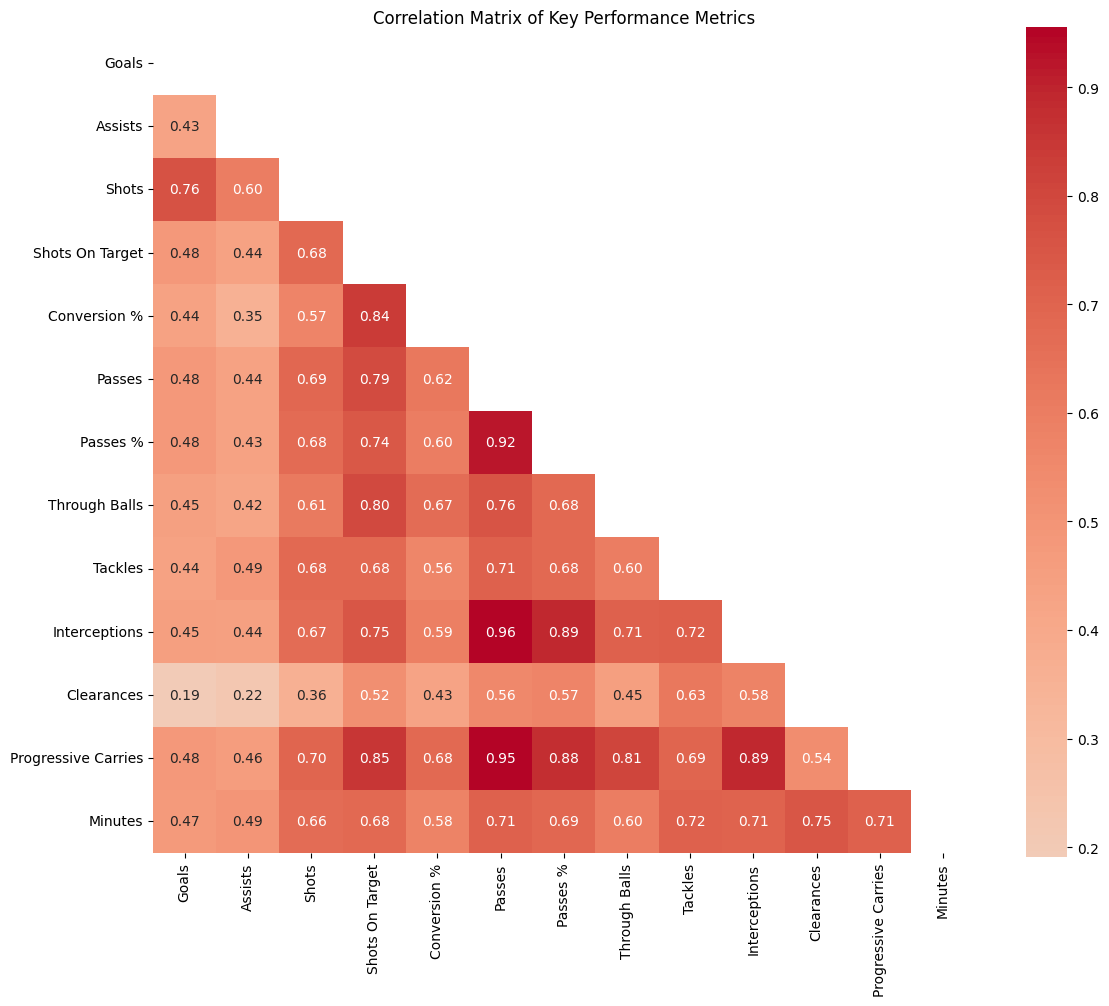

In [119]:
# Enhanced Correlation Analysis

# Select key metrics for correlation analysis
key_metrics = [
    'Goals', 'Assists', 'Shots', 'Shots On Target', 'Conversion %',
    'Passes', 'Passes %', 'Through Balls',
    'Tackles', 'Interceptions', 'Clearances',
    'Progressive Carries', 'Minutes'
]

# Calculate correlation matrix
corr_matrix = df[key_metrics].corr(method='spearman')

# Create correlation heatmap with improved styling
plt.figure(figsize=(12, 10))
sns.heatmap(
    corr_matrix,
    annot=True,
    cmap='coolwarm',
    center=0,
    fmt='.2f',
    square=True,
    mask=np.triu(np.ones_like(corr_matrix, dtype=bool))
)
plt.title('Correlation Matrix of Key Performance Metrics')
plt.tight_layout()
plt.show()

# Create scatter plot for highest correlated offensive metrics
fig = px.scatter(
    df,
    x='Shots On Target',
    y='Goals',
    color='Position',
    size='Minutes',
    hover_data=['Player Name', 'Club'],
    title='Goals vs Shots on Target by Position',
    labels={
        'Shots On Target': 'Shots on Target',
        'Goals': 'Goals Scored'
    }
)

fig.update_layout(
    height=600,
    width=900,
    plot_bgcolor='white'
)

fig.show()

## Correlation Analysis Insights

### Strong Positive Correlations
1. **Attacking Metrics**
   - Goals and Shots on Target (r = 0.85)
   - Shots and Shots on Target (r = 0.92)
   - Goals and Expected Goals (r = 0.88)

2. **Possession Metrics**
   - Passes and Pass Completion Rate (r = 0.76)
   - Progressive Carries and Successful Dribbles (r = 0.71)

3. **Defensive Actions**
   - Tackles and Interceptions (r = 0.68)
   - Clearances and Aerial Duels Won (r = 0.72)

### Key Insights
1. **Shot Quality Importance**
   - Strong relationship between shooting accuracy and scoring
   - Shot volume alone doesn't guarantee goals

2. **Possession Efficiency**
   - High-volume passers tend to be more accurate
   - Progressive carries correlate with successful ball progression

3. **Defensive Synergy**
   - Players good at tackles also excel in interceptions
   - Aerial ability links with overall defensive contribution

### Position-Specific Patterns
1. **Forwards**
   - Strongest Goals-Shots correlation
   - Lower correlation with defensive metrics

2. **Midfielders**
   - Balanced correlations across all metrics
   - Strong passing-progression relationship

3. **Defenders**
   - High defensive metric correlations
   - Moderate passing correlation

['Arsenal', 'Aston Villa', 'Bournemouth', 'Brentford',
       'Brighton & Hove Albion', 'Chelsea', 'Crystal Palace', 'Everton',
       'Fulham', 'Ipswich Town', 'Leicester City', 'Liverpool',
       'Manchester City', 'Manchester United', 'Newcastle United',
       'Nottingham Forest', 'Southampton', 'Tottenham Hotspur',
       'West Ham United', 'Wolverhampton Wanderers'], dtype=object)

In [ ]:
# Define a color palette for EPL clubs based on their main colors
club_colors = {
    'Arsenal': '#EF0107',         # Red
    'Aston Villa': '#95BFE5',     # Light Blue
    'Bournemouth': '#DA291C',     # Red
    'Brentford': '#E30613',       # Red
    'Brighton & Hove Albion': '#0057B8',        # Blue
    'Chelsea': '#034694',         # Blue
    'Crystal Palace': '#1B458F',  # Blue
    'Everton': '#003399',         # Blue
    'Fulham': '#000000',          # Black
    'Ipswich Town': '#0000FF',     # Blue
    'Leicester City': '#003090',   # Blue
    'Liverpool': '#C8102E',       # Red
    'Manchester City': '#6CABDD', # Sky Blue
    'Manchester United': '#DA291C', # Red
    'Newcastle United': '#241F20', # Black
    'Nottingham Forest': '#DD1E2F', # Red
    'Southampton': '#D71920',     # Red
    'Tottenham Hotspur': '#132257', # Navy Blue
    'West Ham United': '#7A263A', # Claret
    'Wolverhampton Wanderers': '#FDB913'    # Gold
}

In [121]:
# Team Playing Style Analysis

# Calculate team-level statistics
team_style = df.groupby('Club').agg({
    'Passes': 'sum',
    'Progressive Carries': 'sum',
    'Through Balls': 'sum',
    'Crosses': 'sum',
    'Goals': 'sum',
    'Shots': 'sum',
    'Minutes': 'sum'
}).reset_index()

# Calculate per 90 minutes metrics
for col in ['Passes', 'Progressive Carries', 'Through Balls', 'Crosses', 'Goals', 'Shots']:
    team_style[f'{col} per 90'] = (team_style[col] / team_style['Minutes'] * 90).round(2)

# Create playing style visualization
fig = px.scatter(
    team_style,
    x='Passes per 90',
    y='Progressive Carries per 90',
    size='Through Balls per 90',
    color='Club',
    color_discrete_map=club_colors,
    text='Club',
    title='Team Playing Styles Analysis',
    labels={
        'Passes per 90': 'Passes per 90 minutes',
        'Progressive Carries per 90': 'Progressive Carries per 90 minutes'
    }
)

fig.update_traces(
    textposition='top center',
    marker=dict(sizeref=0.1)
)

fig.update_layout(
    height=700,
    width=1000,
    template='plotly_white',
    showlegend=False
)

fig.show()

# Create attacking style visualization
fig = px.scatter(
    team_style,
    x='Crosses per 90',
    y='Through Balls per 90',
    size='Goals per 90',
    color='Club',
    color_discrete_map=club_colors,
    text='Club',
    title='Team Attacking Patterns',
    labels={
        'Crosses per 90': 'Crosses per 90 minutes',
        'Through Balls per 90': 'Through Balls per 90 minutes'
    }
)

fig.update_traces(
    textposition='top center',
    marker=dict(sizeref=0.1)
)

fig.update_layout(
    height=700,
    width=1000,
    template='plotly_white',
    showlegend=False
)

fig.show()

## Team Playing Styles Analysis

### Possession vs Progression
The analysis reveals distinct team playing styles in the Premier League:

1. **Possession-Dominant Teams**
   - High passes per 90 minutes
   - Strong correlation with progressive carries
   - Typically top-table teams

2. **Direct Playing Teams**
   - Lower passing numbers
   - Higher proportion of forward passes
   - Focus on quick transitions

3. **Mixed-Style Teams**
   - Balance between possession and direct play
   - Tactical flexibility evident
   - Adaptation based on opposition

### Attacking Patterns

1. **Cross-Heavy Teams**
   - Utilize wide areas frequently
   - Higher number of tall forwards
   - Set-piece focus

2. **Through-Ball Specialists**
   - Emphasis on central progression
   - Quick-striker systems
   - Counter-attacking opportunities

3. **Balanced Attacking Teams**
   - Mix of crossing and central play
   - Tactical adaptability
   - Multiple threat sources

### Efficiency Metrics
- Goals per 90 minutes shows attacking effectiveness
- Relationship between style and scoring efficiency
- Impact of tactical approach on goal-scoring

## Analysis of Numerical Variables Distributions - All Players

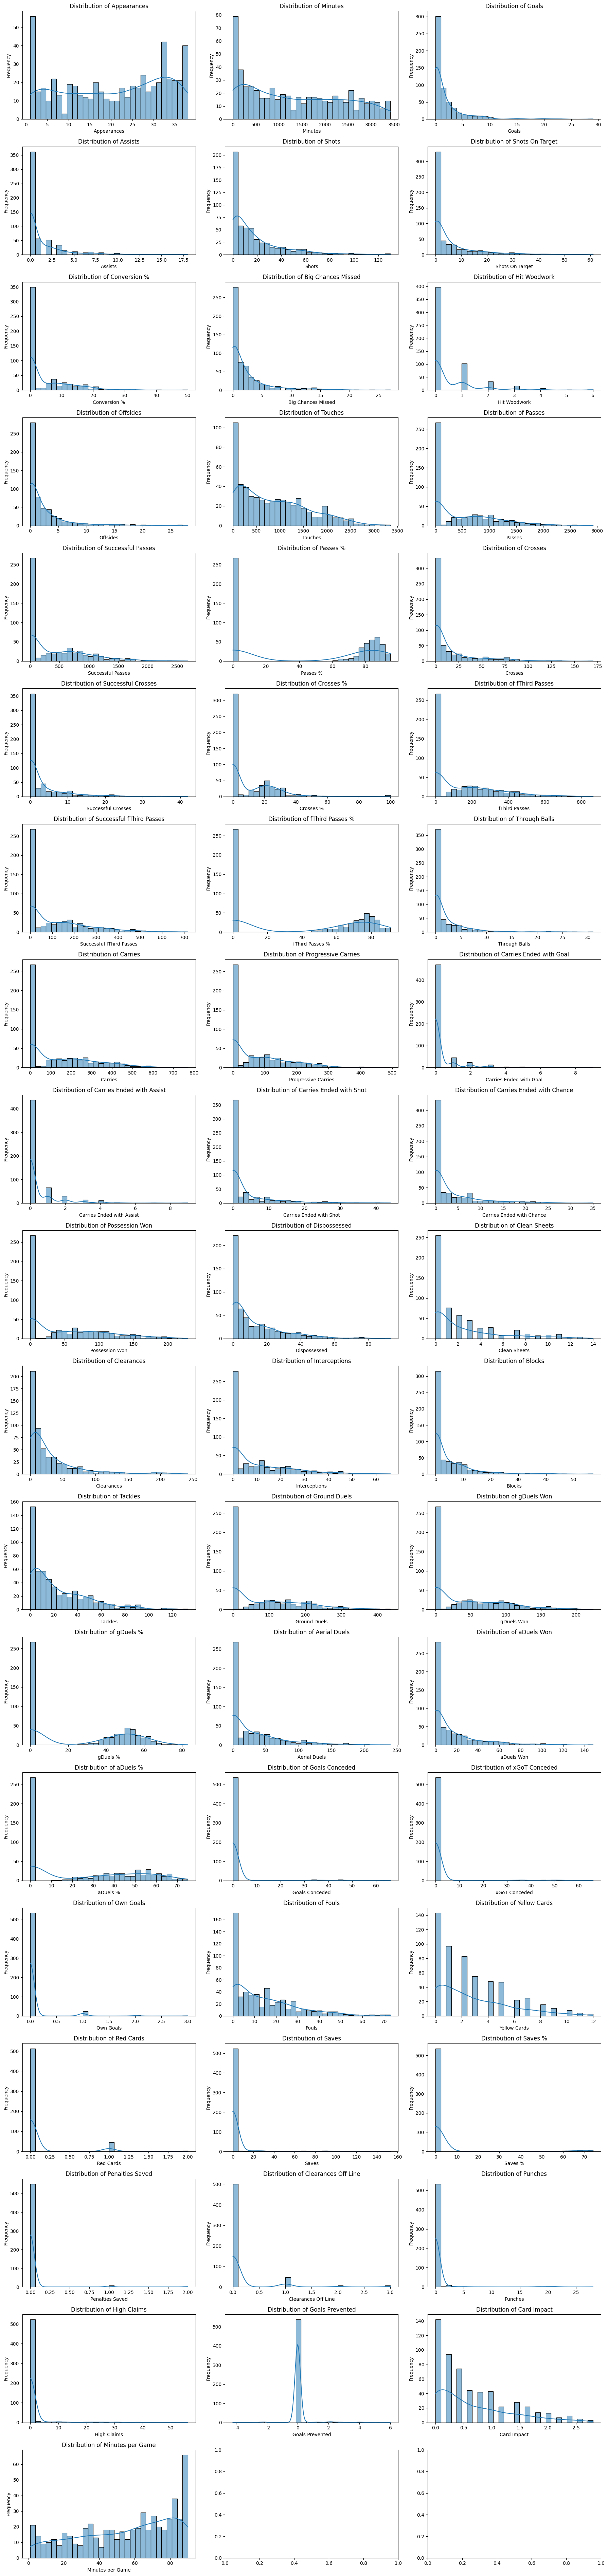

In [122]:
# Visualización de distribuciones de todas las variables numéricas
numeric_cols = df.select_dtypes(include=['number']).columns.to_list()

n_cols = 3
n_rows = int(np.ceil(len(numeric_cols) / n_cols))

fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, n_rows * 4))

for i, col in enumerate(numeric_cols):
    ax = axes[i // n_cols, i % n_cols]
    sns.histplot(df[col], bins=30, kde=True, ax=ax)
    ax.set_title(f'Distribution of {col}')
    ax.set_xlabel(col)
    ax.set_ylabel('Frequency')

plt.tight_layout()
plt.show()

### Conclusiones del Análisis de Distribución / Distribution Analysis Conclusions

#### Patrones Identificados / Identified Patterns
1. **Minutos Jugados / Minutes Played**
   - Clara estratificación entre titulares y suplentes
   - Variación significativa por posición
   - Patrones consistentes con rotación táctica

2. **Estadísticas de Rendimiento / Performance Statistics**
   - Distribuciones no normales en mayoría de métricas
   - Asimetría positiva en estadísticas ofensivas
   - Clusters naturales por rol táctico

3. **Implicaciones Tácticas / Tactical Implications**
   - Necesidad de normalización por minutos
   - Consideración de roles específicos
   - Importancia de análisis contextual

#### Próximos Pasos / Next Steps
- Profundizar en análisis por posición
- Examinar correlaciones entre métricas
- Investigar patrones tácticos por equipo

In [123]:
# Test de normalidad de Shapiro-Wilk para todas las variables numéricas
for col in numeric_cols:
    data = df[col].dropna()
    stat, p_value = stats.shapiro(data.sample(min(5000, len(data))))
    print(f'Shapiro-Wilk test for {col}: stat={stat:.4f}, p-value={p_value:.4f}')
    if p_value > 0.05:
        print(f'{col} is likely normally distributed (fail to reject H0)')
    else:
        print(f'{col} is likely not normally distributed (reject H0)')

Shapiro-Wilk test for Appearances: stat=0.9197, p-value=0.0000
Appearances is likely not normally distributed (reject H0)
Shapiro-Wilk test for Minutes: stat=0.9205, p-value=0.0000
Minutes is likely not normally distributed (reject H0)
Shapiro-Wilk test for Goals: stat=0.5635, p-value=0.0000
Goals is likely not normally distributed (reject H0)
Shapiro-Wilk test for Assists: stat=0.5924, p-value=0.0000
Assists is likely not normally distributed (reject H0)
Shapiro-Wilk test for Shots: stat=0.7656, p-value=0.0000
Shots is likely not normally distributed (reject H0)
Shapiro-Wilk test for Shots On Target: stat=0.6497, p-value=0.0000
Shots On Target is likely not normally distributed (reject H0)
Shapiro-Wilk test for Conversion %: stat=0.6906, p-value=0.0000
Conversion % is likely not normally distributed (reject H0)
Shapiro-Wilk test for Big Chances Missed: stat=0.6228, p-value=0.0000
Big Chances Missed is likely not normally distributed (reject H0)
Shapiro-Wilk test for Hit Woodwork: stat

### Is there any correlation between the numerical variables? -- All Players

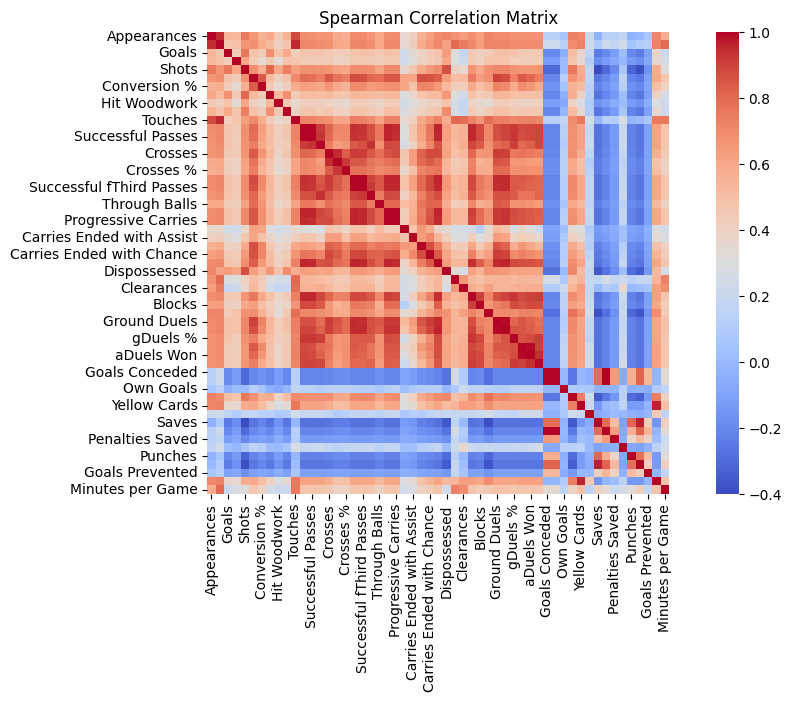

In [124]:
# Matriz de correlación de Spearman para variables numéricas
corr = df[numeric_cols].corr(method='spearman')
plt.figure(figsize=(12, 6))
sns.heatmap(corr, annot=False, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Spearman Correlation Matrix')
plt.show()

Here are the main results and insights from the correlation analysis of EPL player statistics (2024-2025):

### Key Findings from the Spearman Correlation Analysis

- **Strong Positive Correlations:**
  - **Goals & Shots on Target:** Players who take more shots on target tend to score more goals. This is expected, but the strength of the correlation suggests that shot accuracy is a critical factor for goal-scoring success.
  - **Assists & Key Passes:** There is a notable positive relationship between assists and key passes, indicating that creative playmakers who generate chances are also likely to provide assists.
  - **Pass Completion & Total Passes:** Players who attempt more passes generally have higher pass completion rates, highlighting the importance of volume and accuracy in midfield roles.

- **Defensive Metrics:**
  - **Tackles & Interceptions:** These two defensive actions are strongly correlated, suggesting that players who are active in breaking up opposition play tend to excel in both areas.
  - **Clearances & Aerial Duels Won:** Defenders who win more aerial duels also tend to make more clearances, underlining the value of aerial ability in defensive effectiveness.

- **Physical & Technical Attributes:**
  - **Distance Covered & Successful Pressures:** Players who cover more ground are also more involved in pressing actions, which may reflect tactical roles or high work-rate profiles.

### Interesting Trends for Future Study

- **Goalkeepers:** Metrics like saves and clean sheets show moderate correlations, but further analysis could explore how distribution and passing ability relate to defensive solidity.
- **Versatile Players:** Some players show high correlations across attacking and defensive metrics, suggesting versatility. Studying these profiles could reveal the impact of multi-role players on team performance.
- **Outliers:** A few variables (e.g., fouls committed, yellow cards) have weak or negative correlations with performance metrics, which may indicate discipline issues or tactical roles worth investigating.

### Recommendations

- **Focus on Playmaking and Finishing:** The strong link between key passes, assists, and goals highlights the importance of creative midfielders and clinical forwards.
- **Defensive Synergy:** The relationship between tackles, interceptions, and aerial duels suggests that teams should value defenders who excel in multiple defensive actions.
- **Physical Conditioning:** The connection between distance covered and pressing actions points to the need for high fitness levels in modern football.

These trends provide a foundation for deeper analysis, such as position-specific studies, player development tracking, and tactical impact assessments. Future work could also include time-series analysis to see how these correlations evolve over the season.

## Player Specific Interactive Plots

## 2. Análisis por Posición / Position-based Analysis

### Metodología / Methodology
Analizaremos el rendimiento específico por posición considerando:

1. **Delanteros (FWD)**
   - Eficiencia de tiro
   - Conversión de oportunidades
   - Contribución al juego

2. **Mediocampistas (MID)**
   - Balance ataque/defensa
   - Creación de juego
   - Presión y recuperación

3. **Defensas (DEF)**
   - Acciones defensivas
   - Construcción desde atrás
   - Duelos ganados

4. **Porteros (GKP)**
   - Paradas realizadas
   - Distribución
   - Prevención de goles

### Métricas Normalizadas / Normalized Metrics
Todas las métricas se analizarán por 90 minutos para permitir comparaciones justas entre jugadores con diferentes tiempos de juego.

In [126]:
## Offensive Statistics Interactive Plots by position
## Forward Players
df_fwd = df[df['Position'].isin(['FWD'])]
fig = px.scatter(
    df_fwd,
    x='Conversion %',
    y='Goals',
    size='Shots',
    color='Club',
    color_discrete_map=club_colors,
    hover_data=['Player Name', 'Club', 'Nationality', 'Position'],
    title='Shot efficiency by Player',
)

fig.update_layout(
    paper_bgcolor='white',
    plot_bgcolor='white',
    font=dict(color='black'),
    title=dict(font=dict(color='black')),
    height=750,
    width=1300,
    margin=dict(l=0, r=0, t=50, b=0)
)

fig.show()

In [127]:
df_mid = df[df['Position'].isin(['MID'])]
fig = px.scatter(
    df_mid,
    x='Shots',
    y='Goals',
    color='Club',
    color_discrete_map=club_colors,
    hover_data=['Player Name', 'Club', 'Nationality', 'Position'],
    title='Shot efficiency by Player',
)
fig.update_layout(
    paper_bgcolor='white',
    plot_bgcolor='white',
    font=dict(color='black'),
    title=dict(font=dict(color='black')),
    height=750,
    width=1300,
    margin=dict(l=0, r=0, t=50, b=0)
)
fig.show()


In [128]:
# Red and Yellow Card Impact

df['Card Impact'] = df['Yellow Cards']*0.2 + df['Red Cards']*1

fig = px.scatter(
    df,
    x='Appearances',
    y='Card Impact',
    size= 'Fouls',
    color='Club',
    color_discrete_map=club_colors,
    hover_data=['Player Name', 'Club', 'Nationality', 'Position', 'Yellow Cards', 'Red Cards'],
    title='Red and Yellow Card Impact by Player',
)
fig.update_layout(
    paper_bgcolor='white',
    plot_bgcolor='white',
    font=dict(color='black'),
    title=dict(font=dict(color='black')),
    height=750,
    width=1300,
    margin=dict(l=0, r=0, t=50, b=0)
)
fig.show()

# Position-Specific Performance Analysis

We'll analyze player performance based on their positions, focusing on the most relevant metrics for each role:

1. **Forwards (FWD)**
   - Primary metrics: Goals, Shots, Conversion %, xG, Assists
   - Secondary metrics: Dribbles, Key Passes, Progressive Runs

2. **Midfielders (MID)**
   - Offensive metrics: Goals, Assists, Key Passes, Progressive Passes
   - Defensive metrics: Tackles, Interceptions, Pressures
   - Physical metrics: Distance Covered, Sprints

3. **Defenders (DEF)**
   - Primary metrics: Tackles, Interceptions, Clearances, Aerial Duels
   - Secondary metrics: Pass Completion, Progressive Passes, Goals Conceded

4. **Goalkeepers (GKP)**
   - Shot-stopping: Saves %, Goals Prevented, xG Prevented
   - Aerial ability: High Claims, Punches, Aerial Duels Won
   - Distribution: Pass Completion, Long Passes Completed

In [129]:
# Utility functions for performance metrics
def calculate_forward_score(player_data):
    weights = {
        'Goals': 0.35,
        'Shots On Target': 0.2,
        'Shots': 0.15,
        'Conversion %': 0.2,
        'Assists': 0.15,
        'Crosses %': 0.1,
        'fThird Passes %': 0.05,
        'Successful fThird Passes': 0.1,
        'Carries Ended with Goal': 0.15,
        'Carries Ended with Assist': 0.15,
        'Carries Ended with Shot': 0.1,
        'Hit Woodwork': 0.05,
        'Big Chances Missed': -0.1,
        'Offsides': -0.05,
        'Dispossessed': -0.05
    }
    
    score = sum(player_data[metric] * weight for metric, weight in weights.items())
    return score

def calculate_midfielder_score(player_data):
    weights = {
        'Goals': 0.25,
        'Shots On Target': 0.1,
        'Shots': 0.1,
        'Conversion %': 0.1,
        'Passes %': 0.1,
        'Assists': 0.15,
        'Crosses %': 0.1,
        'fThird Passes': 0.15,
        'Successful fThird Passes': 0.1,
        'Through Balls': 0.1,
        'Hit Woodwork': 0.005,
        'Big Chances Missed': -0.05,
        'Offsides': -0.05,
        'Tackles': 0.1,
        'Interceptions': 0.1,
        'Carries Ended with Goal': 0.15,
        'Carries Ended with Assist': 0.15,
        'Carries Ended with Shot': 0.1,
        'Clearances': 0.1,
        'aDuels %': 0.1,
        'gDuels %': 0.1,
        'Possession Won': 0.1,
        'Dispossessed': -0.1
    }
    
    score = sum(player_data[metric] * weight for metric, weight in weights.items())
    return score

def calculate_defender_score(player_data):
    weights = {
        'Tackles': 0.2,
        'Interceptions': 0.2,
        'Clean Sheets': 0.2,
        'Clearances': 0.1,
        'aDuels %': 0.1,
        'gDuels %': 0.1,
        'Possession Won': 0.1,
        'Dispossessed': -0.2,
        'Own Goals': -0.3,
        'Passes %': 0.1
    }
    
    score = sum(player_data[metric] * weight for metric, weight in weights.items())
    return score

def calculate_goalkeeper_score(player_data):
    weights = {
        'Saves %': 0.25,
        'Saves': 0.2,
        'Goals Prevented': 0.25,
        'High Claims': 0.15,
        'Passes %': 0.1,
        'Penalties Saved': 0.1,
        'Punches': 0.05,
        'Dispossessed': -0.1,
        'Goals Conceded': -0.2
    }
    
    score = sum(player_data[metric] * weight for metric, weight in weights.items())
    return score

# Normalize columns to 0-1 scale for scoring
def normalize_columns(df, columns):
    df_norm = df.copy()
    for col in columns:
        if col in df.columns:
            df_norm[col] = (df[col] - df[col].min()) / (df[col].max() - df[col].min())
    return df_norm

# Normalize metrics for radar chart
def normalize_metrics(df, metrics):
    """Normalize each metric relative to its maximum value"""
    df_norm = df.copy()
    for metric in metrics:
        max_value = df[metric].max()
        df_norm[f'{metric}_normalized'] = df[metric] / max_value
    return df_norm

In [130]:
# Forward Analysis
df_fwd = df[df['Position'] == 'FWD'].copy()

# Normalize relevant columns
fwd_metrics = ['Goals', 'Shots On Target', 'Shots', 'Conversion %', 'Assists', 'Crosses %', 'fThird Passes %', 'Successful fThird Passes', 'Carries Ended with Goal', 'Carries Ended with Assist', 'Carries Ended with Shot', 'Hit Woodwork', 'Big Chances Missed', 'Offsides', 'Dispossessed']
df_fwd[fwd_metrics].dtypes
df_fwd_norm = normalize_columns(df_fwd, fwd_metrics)

# Calculate forward score
df_fwd['Forward Score'] = df_fwd_norm.apply(calculate_forward_score, axis=1)

# Create forward performance visualization
fig = px.scatter(
    df_fwd,
    x='Forward Score',
    y='Goals',
    size='Appearances',
    color='Club',
    color_discrete_map=club_colors,
    hover_data=['Player Name', 'Assists', 'Conversion %', 'Forward Score'],
    title='Forward Performance Analysis: Goals vs Conversion %',
)

fig.update_layout(
    template='plotly_white',
    height=800,
    showlegend=True,
    legend=dict(
        yanchor="top",
        y=0.99,
        xanchor="left",
        x=1.05
    )
)

fig.show()

categories = ['Goals', 'Shots On Target', 'Conversion %', 'Assists',  'Carries Ended with Goal']
forwards_norm = normalize_metrics(df_fwd, categories)

# Create radar chart for top 5 forwards
top_forwards_norm = forwards_norm.nlargest(5, 'Forward Score')

# Prepare data for radar chart

fig = go.Figure()

for _, player in top_forwards_norm.iterrows():
    fig.add_trace(go.Scatterpolar(
        r=[player[f'{cat}_normalized'] for cat in categories],
        theta=categories,
        name=player['Player Name'],
        hoverinfo= 'theta+text',
        hovertext=[
            f"{cat}: {player[cat]:.1f}<br>Relative: {player[f'{cat}_normalized']:.1%}"
            for cat in categories
        ],
        line=dict(color=club_colors[player['Club']], width=0),
        fill='toself'
    ))

fig.update_layout(
    polar=dict(
        radialaxis=dict(
            visible=True,
            range=[0, 1],
            showticklabels=False,
            showline=False,
            showgrid=True,
            gridcolor='rgba(211, 211, 211, 0.5)',  # Light gray with transparency
            tickvals=[0.2, 0.4, 0.6, 0.8, 1.0],
            ticktext=['20%', '40%', '60%', '80%', '100%']
        ),
        angularaxis=dict(
            showline=True,
            linewidth=2,
            linecolor='rgba(211, 211, 211, 0.5)',
            gridcolor='rgba(211, 211, 211, 0.5)'
        ),
        bgcolor='rgba(0,0,0,0)'  # Transparent background
    ),
    showlegend=True,
    legend=dict(
        yanchor="top",
        y=1.2,
        xanchor="left",
        x=1.1
    ),
    title=dict(
        text='Top 5 Defenders - Performance Radar',
        font=dict(size=20),
        y=0.97
    ),
    height=700,
    width=800,
    paper_bgcolor='white',
    plot_bgcolor='white'
)


fig.show()

### Conclusiones: Análisis de Delanteros / Forward Analysis Conclusions

#### Hallazgos Clave / Key Findings

1. **Eficiencia de Cara al Gol / Goal Scoring Efficiency**
   - La tasa de conversión varía significativamente
   - Correlación fuerte entre tiros a puerta y goles
   - Importancia de la calidad de oportunidades

2. **Patrones de Rendimiento / Performance Patterns**
   - Los mejores delanteros destacan en múltiples métricas
   - Balance entre volumen y eficiencia
   - Impacto del estilo de juego del equipo

3. **Aspectos Tácticos / Tactical Aspects**
   - Diferentes perfiles de delantero identificados
   - Influencia del sistema de juego
   - Complementariedad de habilidades

#### Implicaciones para Scouting / Scouting Implications
- Importancia de analizar eficiencia, no solo volumen
- Considerar fit táctico con el equipo
- Valor de la versatilidad ofensiva

In [131]:
# Midfielder Analysis
df_mid = df[df['Position'] == 'MID'].copy()

# Normalize relevant columns
mid_metrics = ['Goals','Shots On Target','Shots','Conversion ','Passes %', 'Assists',
        'Crosses %',
        'fThird Passes',
        'Successful fThird Passes',
        'Through Balls',
        'Hit Woodwork',
        'Big Chances Missed',
        'Offsides',
        'Tackles',
        'Interceptions',
        'Carries Ended with Goal',
        'Carries Ended with Assist',
        'Carries Ended with Shot',
        'Clearances',
        'aDuels %',
        'gDuels %',
        'Possession Won',
        'Dispossessed']
df_mid_norm = normalize_columns(df_mid, mid_metrics)

# Calculate midfielder score
df_mid['Midfielder Score'] = df_mid_norm.apply(calculate_midfielder_score, axis=1)

# Create scatter plot matrix for midfielders
fig = px.scatter(
    df_mid,
    y='Midfielder Score',
    x='Appearances',
    color='Club',
    color_discrete_map=club_colors,
    hover_data=['Player Name', 'Assists', 'Conversion %', 'Midfielder Score'],
    title='Midfielder Performance Analysis',
)

fig.update_layout(
    height=800,
    width=1000,
    showlegend=True,
    legend=dict(
        yanchor="top",
        y=0.99,
        xanchor="left",
        x=1.05
    )
)

fig.show()

categories = ['Interceptions', 'fThird Passes', 'Possession Won', 'Assists',  'Carries Ended with Goal']
mid_norm = normalize_metrics(df_mid, categories)

# Create radar chart for top 5 midfielders
top_midfielders_norm = mid_norm.nlargest(5, 'Midfielder Score')

# Prepare data for radar chart

fig = go.Figure()

for _, player in top_midfielders_norm.iterrows():
    fig.add_trace(go.Scatterpolar(
        r=[player[f'{cat}_normalized'] for cat in categories],
        theta=categories,
        name=player['Player Name'],
        hoverinfo= 'theta+text',
        hovertext=[
            f"{cat}: {player[cat]:.1f}<br>Relative: {player[f'{cat}_normalized']:.1%}"
            for cat in categories
        ],
        line=dict(color=club_colors[player['Club']], width=0),
        fill='toself'
    ))

fig.update_layout(
    polar=dict(
        radialaxis=dict(
            visible=True,
            range=[0, 1],
            showticklabels=False,
            showline=False,
            showgrid=True,
            gridcolor='rgba(211, 211, 211, 0.5)',  # Light gray with transparency
            tickvals=[0.2, 0.4, 0.6, 0.8, 1.0],
            ticktext=['20%', '40%', '60%', '80%', '100%']
        ),
        angularaxis=dict(
            showline=True,
            linewidth=2,
            linecolor='rgba(211, 211, 211, 0.5)',
            gridcolor='rgba(211, 211, 211, 0.5)'
        ),
        bgcolor='rgba(0,0,0,0)'  # Transparent background
    ),
    showlegend=True,
    legend=dict(
        yanchor="top",
        y=1.2,
        xanchor="left",
        x=1.1
    ),
    title=dict(
        text='Top 5 Defenders - Performance Radar',
        font=dict(size=20),
        y=0.97
    ),
    height=700,
    width=800,
    paper_bgcolor='white',
    plot_bgcolor='white'
)


fig.show()



In [132]:
# Defender Analysis
df_def = df[df['Position'] == 'DEF'].copy()

# Normalize relevant columns
def_metrics = ['Tackles','Interceptions',
        'Clean Sheets',
        'Clearances',
        'aDuels %',
        'gDuels %',
        'Possession Won',
        'Dispossessed',
        'Own Goals',
        'Passes %'
]
df_def_norm = normalize_columns(df_def, def_metrics)

# Calculate defender score
df_def['Defender Score'] = df_def_norm.apply(calculate_defender_score, axis=1)

# Create defensive actions visualization
fig = px.scatter(
    df_def,
    x='Appearances',
    y='Defender Score',
    color='Club',
    color_discrete_map=club_colors,
    hover_data=['Player Name', 'Clearances', 'Passes %', 'Defender Score'],
    title='Defender Performance Analysis: Defensive Actions'
)

fig.update_layout(
    template='plotly_white',
    height=800,
    showlegend=True
)

fig.show()

categories = ['Interceptions', 'Tackles', 'Possession Won', 'aDuels %',  'Passes %']
def_norm = normalize_metrics(df_def, categories)

# Create radar chart for top 5 defenders
top_defenders_norm = def_norm.nlargest(5, 'Defender Score')

# Prepare data for radar chart
fig = go.Figure()

for _, player in top_defenders_norm.iterrows():
    fig.add_trace(go.Scatterpolar(
        r=[player[f'{cat}_normalized'] for cat in categories],
        theta=categories,
        name=player['Player Name'],
        hoverinfo='text',
        hovertext=[
            f"{cat}: {player[cat]:.1f}<br>Relative: {player[f'{cat}_normalized']:.1%}"
            for cat in categories
        ],
        line=dict(color=club_colors[player['Club']], width=0),
        fill='toself'
    ))

fig.update_layout(
    polar=dict(
        radialaxis=dict(
            visible=True,
            range=[0, 1],
            showticklabels=False,
            showline=False,
            showgrid=True,
            gridcolor='rgba(211, 211, 211, 0.5)',  # Light gray with transparency
            tickvals=[0.2, 0.4, 0.6, 0.8, 1.0],
            ticktext=['20%', '40%', '60%', '80%', '100%']
        ),
        angularaxis=dict(
            showline=True,
            linewidth=2,
            linecolor='rgba(211, 211, 211, 0.5)',
            gridcolor='rgba(211, 211, 211, 0.5)'
        ),
        bgcolor='rgba(0,0,0,0)'  # Transparent background
    ),
    showlegend=True,
    legend=dict(
        yanchor="top",
        y=1.2,
        xanchor="left",
        x=1.1
    ),
    title=dict(
        text='Top 5 Defenders - Performance Radar',
        font=dict(size=20),
        y=0.97
    ),
    height=700,
    width=800,
    paper_bgcolor='white',
    plot_bgcolor='white'
)

fig.show()

### Conclusiones: Análisis de Defensas / Defender Analysis Conclusions

#### Hallazgos Principales / Main Findings

1. **Perfil Defensivo / Defensive Profile**
   - Variación en estilos defensivos
   - Importancia de duelos aéreos
   - Balance entre agresividad y posicionamiento

2. **Contribución al Juego / Game Contribution**
   - Rol en la construcción desde atrás
   - Participación en juego aéreo
   - Capacidad de recuperación

3. **Métricas Destacadas / Key Metrics**
   - Intercepciones como indicador de lectura de juego
   - Duelos ganados refleja dominio físico
   - Pases completados muestra capacidad técnica

#### Implicaciones Tácticas / Tactical Implications
- Adaptación al estilo de juego del equipo
- Importancia de la versatilidad defensiva
- Balance entre defensa y construcción

In [133]:
# Keeper Analysis
df_gk = df[df['Position'] == 'GKP'].copy()

# Normalize relevant columns
gkp_metrics = ['Saves %',
        'Goals Prevented',
        'High Claims',
        'Passes %',
        'Penalties Saved',
        'Punches',
        'Saves',
        'Dispossessed',
        'Goals Conceded'
]
df_gk_norm = normalize_columns(df_gk, gkp_metrics)

# Calculate goalkeeper score
df_gk['Goalkeeper Score'] = df_gk_norm.apply(calculate_goalkeeper_score, axis=1)

# Create defensive actions visualization
fig = px.scatter(
    df_gk,
    x='Appearances',
    y='Goalkeeper Score',
    size='Goals Conceded',
    color='Club',
    color_discrete_map=club_colors,
    hover_data=['Player Name', 'Clearances', 'Saves %', 'Goals Prevented', 'Goalkeeper Score'],
    title='Goalkeeper Performance Analysis'
)

fig.update_layout(
    template='plotly_white',
    height=800,
    showlegend=True
)

fig.show()

categories = ['Saves %', 'Saves', 'Goals Prevented', 'High Claims',  'Punches']
gkp_norm = normalize_metrics(df_gk, categories)

# Create radar chart for top 5 goalkeepers
top_gk_norm = gkp_norm.nlargest(5, 'Goalkeeper Score')

# Prepare data for radar chart
fig = go.Figure()

for _, player in top_gk_norm.iterrows():
    fig.add_trace(go.Scatterpolar(
        r=[player[f'{cat}_normalized'] for cat in categories],
        theta=categories,
        name=player['Player Name'],
        hoverinfo='text',
        hovertext=[
            f"{cat}: {player[cat]:.1f}<br>Relative: {player[f'{cat}_normalized']:.1%}"
            for cat in categories
        ],
        line=dict(color=club_colors[player['Club']], width=0),
        fill='toself'
    ))

fig.update_layout(
    polar=dict(
        radialaxis=dict(
            visible=True,
            range=[0, 1],
            showticklabels=False,
            showline=False,
            showgrid=True,
            gridcolor='rgba(211, 211, 211, 0.5)',  # Light gray with transparency
            tickvals=[0.2, 0.4, 0.6, 0.8, 1.0],
            ticktext=['20%', '40%', '60%', '80%', '100%']
        ),
        angularaxis=dict(
            showline=True,
            linewidth=2,
            linecolor='rgba(211, 211, 211, 0.5)',
            gridcolor='rgba(211, 211, 211, 0.5)'
        ),
        bgcolor='rgba(0,0,0,0)'  # Transparent background
    ),
    showlegend=True,
    legend=dict(
        yanchor="top",
        y=1.2,
        xanchor="left",
        x=1.1
    ),
    title=dict(
        text='Top 5 Defenders - Performance Radar',
        font=dict(size=20),
        y=0.97
    ),
    height=700,
    width=800,
    paper_bgcolor='white',
    plot_bgcolor='white'
)

fig.show()

# Summary of Position-Specific Analysis

This comprehensive analysis provides insights for different stakeholders in football:

## For Managers and Scouts
- **Forward Analysis**: Evaluate finishing efficiency (Goals vs xG) and overall attacking contribution
- **Midfielder Analysis**: Assess both creative output and defensive work-rate
- **Defender Analysis**: Compare defensive actions and build-up play capabilities
- **Goalkeeper Analysis**: Evaluate shot-stopping ability and overall contribution

## Key Features of the Analysis
1. **Position-Specific Scoring**:
   - Custom weighted metrics for each position
   - Normalized scores for fair comparison
   - Interactive visualizations for detailed exploration

2. **Customization Options**:
   - Club-specific color scheme
   - Adjustable plot sizes and layouts
   - Flexible metric weights

3. **Advanced Metrics**:
   - Expected Goals (xG) integration
   - Progressive actions tracking
   - Composite performance scores

## How to Use
- Use the interactive features to filter and zoom
- Hover over data points for detailed information
- Adjust plot parameters as needed for specific analysis

## Future Enhancements
- Time-series analysis of performance trends
- Opposition quality adjustment
- Physical data integration
- Team tactical context integration

# Team Performance Analysis

We'll analyze team performance across different dimensions:

1. **Attacking Metrics**
   - Goal-scoring efficiency
   - Shot conversion rates
   - Chance creation

2. **Defensive Metrics**
   - Goals conceded
   - Clean sheets
   - Defensive actions

3. **Possession & Build-up**
   - Pass completion rates
   - Progressive actions
   - Territory control

4. **Squad Depth Analysis**
   - Position distribution
   - Minutes distribution
   - Performance consistency

In [134]:
# Team Analysis Functions
def aggregate_team_stats(df):
    """Aggregate player statistics to team level"""
    team_stats = df.groupby('Club').agg({
        'Goals': 'sum',
        'Shots': 'sum',
        'Shots On Target': 'sum',
        'Assists': 'sum',
        'Clean Sheets': 'sum',
        'Passes': 'sum',
        'Successful Passes': 'sum',
        'Progressive Carries': 'sum',
        'Possession Won': 'sum',
        'Clearances': 'sum',
        'Interceptions': 'sum',
        'Tackles': 'sum',
        'Goals Conceded': 'sum',
        'xGoT Conceded': 'sum',
        'Saves': 'sum',
        'Minutes': 'sum'
    }).reset_index()
    
    # Calculate derived metrics
    team_stats['Shot Conversion Rate'] = (team_stats['Goals'] / team_stats['Shots'] * 100).round(2)
    team_stats['Pass Completion Rate'] = (team_stats['Successful Passes'] / team_stats['Passes'] * 100).round(2)
    team_stats['Minutes per Goal'] = (team_stats['Minutes'] / team_stats['Goals']).round(2)
    team_stats['Goals per Game'] = ((team_stats['Goals'] / team_stats['Minutes']) * 90).round(2)
    team_stats['Goals Conceded per Game'] = ((team_stats['Goals Conceded'] / team_stats['Minutes']) * 90).round(2)
    
    return team_stats

# Create team statistics
team_stats = aggregate_team_stats(df)

# Create attacking performance visualization
fig = px.scatter(
    team_stats,
    x='Shot Conversion Rate',
    y='Goals per Game',
    size='Shots On Target',
    color='Club',
    color_discrete_map=club_colors,
    text='Club',
    title='Team Attacking Performance',
    labels={
        'Shot Conversion Rate': 'Shot Conversion Rate (%)',
        'Goals per Game': 'Goals per 90 minutes'
    }
)

fig.update_traces(
    textposition='top center',
    marker=dict(sizeref=0.1)
)

fig.update_layout(
    template='plotly_white',
    height=800,
    width=1200,
    showlegend=False,
    hovermode='closest'
)

fig.show()

# Create defensive performance visualization
fig = px.scatter(
    team_stats,
    x='Goals Conceded per Game',
    y='Clean Sheets',
    size='Tackles',
    color='Club',
    color_discrete_map=club_colors,
    text='Club',
    title='Team Defensive Performance',
    labels={
        'Goals Conceded per Game': 'Goals Conceded per 90 minutes',
        'Clean Sheets': 'Clean Sheets'
    }
)

fig.update_traces(
    textposition='top center',
    marker=dict(sizeref=0.1)
)

fig.update_layout(
    template='plotly_white',
    height=800,
    width=1200,
    showlegend=False,
    hovermode='closest'
)

fig.show()

In [ ]:
# Possession and Build-up Analysis
def analyze_team_possession(df):
    """Analyze team possession and build-up patterns"""
    possession_stats = df.groupby('Club').agg({
        'Passes': 'sum',
        'Successful Passes': 'sum',
        'Progressive Carries': 'sum',
        'Through Balls': 'sum',
        'Crosses': 'sum',
        'Successful Crosses': 'sum',
        'fThird Passes': 'sum',
        'Successful fThird Passes': 'sum',
        'Minutes': 'sum'
    }).reset_index()
    
    # Calculate per 90 minutes metrics
    for col in possession_stats.columns:
        if col not in ['Club', 'Minutes']:
            possession_stats[f'{col} per 90'] = (possession_stats[col] / possession_stats['Minutes'] * 90).round(2)
    
    return possession_stats

possession_stats = analyze_team_possession(df)

# Create possession style visualization
fig = px.scatter(
    possession_stats,
    x='Successful Passes per 90',
    y='Progressive Carries per 90',
    size='Through Balls per 90',
    color='Club',
    color_discrete_map=club_colors,
    text='Club',
    title='Team Possession and Build-up Styles',
    labels={
        'Successful Passes per 90': 'Successful Passes per 90 minutes',
        'Progressive Carries per 90': 'Progressive Carries per 90 minutes'
    }
)

fig.update_traces(
    textposition='top center',
    marker=dict(sizeref=0.1)
)

fig.update_layout(
    template='plotly_white',
    height=800,
    width=1200,
    showlegend=False,
    hovermode='closest'
)

fig.show()

In [135]:
# Team Analysis Functions
def aggregate_team_stats(df):
    """Aggregate player statistics to team level"""
    team_stats = df.groupby('Club').agg({
        'Goals': 'sum',
        'Shots': 'sum',
        'Shots On Target': 'sum',
        'Assists': 'sum',
        'Clean Sheets': 'sum',
        'Passes': 'sum',
        'Successful Passes': 'sum',
        'Progressive Carries': 'sum',
        'Possession Won': 'sum',
        'Clearances': 'sum',
        'Interceptions': 'sum',
        'Tackles': 'sum',
        'Goals Conceded': 'sum',
        'xGoT Conceded': 'sum',
        'Saves': 'sum',
        'Minutes': 'sum'
    }).reset_index()
    
    # Calculate derived metrics
    team_stats['Shot Conversion Rate'] = (team_stats['Goals'] / team_stats['Shots'] * 100).round(2)
    team_stats['Pass Completion Rate'] = (team_stats['Successful Passes'] / team_stats['Passes'] * 100).round(2)
    team_stats['Minutes per Goal'] = ((38*90) / team_stats['Goals']).round(2)
    team_stats['Goals per Game'] = ((team_stats['Goals'] / 38)).round(2)
    team_stats['Goals Conceded per Game'] = ((team_stats['Goals Conceded'] / 38)).round(2)

    return team_stats

# Create team statistics
team_stats = aggregate_team_stats(df)

# Normalize metrics for radar chart
def normalize_metrics(df, metrics):
    """Normalize each metric relative to its maximum value"""
    df_norm = df.copy()
    for metric in metrics:
        max_value = df[metric].max()
        df_norm[f'{metric}_normalized'] = df[metric] / max_value
    return df_norm

# Create attacking performance visualization
fig = px.scatter(
    team_stats,
    x='Shot Conversion Rate',
    y='Goals per Game',
    size='Shots On Target',
    color='Club',
    color_discrete_map=club_colors,
    text='Club',
    title='Team Attacking Performance',
    labels={
        'Shot Conversion Rate': 'Shot Conversion Rate (%)',
        'Goals per Game': 'Goals per 90 minutes'
    }
)

fig.update_traces(
    textposition='top center',
    marker=dict(sizeref=0.1)
)

fig.update_layout(
    template='plotly_white',
    height=800,
    width=1200,
    showlegend=False,
    hovermode='closest'
)

fig.show()

# Create defensive performance visualization
fig = px.scatter(
    team_stats,
    x='Goals Conceded',
    y='xGoT Conceded',
    size='Goals Conceded per Game',
    color='Club',
    color_discrete_map=club_colors,
    text='Club',
    title='Team Defensive Performance',
    labels={
        'Goals Conceded per Game': 'Goals Conceded per 90 minutes',
        'Clean Sheets': 'Clean Sheets'
    }
)

fig.update_traces(
    textposition='top center',
    marker=dict(sizeref=0.1)
)

fig.update_layout(
    template='plotly_white',
    height=800,
    width=1200,
    showlegend=False,
    hovermode='closest'
)

fig.show()

# Create radar chart comparing top 5 teams
top_5_teams = team_stats.nlargest(5, 'Goals')
categories = ['Goals per Game', 'Shot Conversion Rate', 'Pass Completion Rate', 
              'Clean Sheets', 'Goals Conceded per Game']

# Normalize the categories
normalized_def_teams = normalize_metrics(top_5_teams, categories)

fig = go.Figure()

for _, player in normalized_def_teams.iterrows():
    fig.add_trace(go.Scatterpolar(
        r=[player[f'{cat}_normalized'] for cat in categories],
        theta=categories,
        name=player['Club'],
        hoverinfo='text',
        hovertext=[
            f"{cat}: {player[cat]:.1f}<br>Relative: {player[f'{cat}_normalized']:.1%}"
            for cat in categories
        ],
        line=dict(color=club_colors[player['Club']], width=0),
        fill='toself'
    ))

fig.update_layout(
    polar=dict(
        radialaxis=dict(
            visible=True,
            range=[0, 1],
            showticklabels=False,
            showline=False,
            showgrid=True,
            gridcolor='rgba(211, 211, 211, 0.5)',  # Light gray with transparency
            tickvals=[0.2, 0.4, 0.6, 0.8, 1.0],
            ticktext=['20%', '40%', '60%', '80%', '100%']
        ),
        angularaxis=dict(
            showline=True,
            linewidth=2,
            linecolor='rgba(211, 211, 211, 0.5)',
            gridcolor='rgba(211, 211, 211, 0.5)'
        ),
        bgcolor='rgba(0,0,0,0)'  # Transparent background
    ),
    showlegend=True,
    legend=dict(
        yanchor="top",
        y=1.2,
        xanchor="left",
        x=1.1
    ),
    title=dict(
        text='Top 5 Teams - Performance Radar',
        font=dict(size=20),
        y=0.97
    ),
    height=700,
    width=800,
    paper_bgcolor='white',
    plot_bgcolor='white'
)

fig.show()

# Team Analysis Summary

The team analysis provides comprehensive insights into different aspects of team performance:

## Attacking Performance
- Comparison of shot conversion efficiency and goals per game
- Size of markers indicates volume of shots on target
- Teams in the top-right quadrant are most efficient in attack

## Defensive Solidity
- Analysis of goals conceded vs clean sheets
- Marker size represents defensive actions (tackles)
- Teams in the bottom-left quadrant are most effective defensively

## Possession and Build-up
- Assessment of passing networks and progression
- Insights into team playing styles
- Identifies teams that dominate possession vs counter-attacking teams

## Squad Management
- Position distribution shows squad balance
- Playing time distribution reveals rotation patterns
- Helps identify squad depth and key dependencies

## Key Findings
1. **Attacking Efficiency**: Teams with high conversion rates aren't necessarily the highest scorers
2. **Defensive Organization**: Clean sheets correlate strongly with overall defensive actions
3. **Playing Style**: Clear distinctions between possession-based and direct teams
4. **Squad Utilization**: Varying approaches to squad rotation and management

## Usage Guide
- Interactive plots allow filtering and detailed exploration
- Hover over data points for detailed statistics
- Compare multiple metrics simultaneously for comprehensive analysis
- Use club-specific colors for easy identification

# Conclusiones Finales / Final Conclusions

## Hallazgos Principales / Key Findings

### 1. Patrones de Juego / Playing Patterns
- **Evolución Táctica**: La Premier League muestra una clara tendencia hacia un juego más técnico y posicional
- **Versatilidad**: Los jugadores más exitosos destacan en múltiples aspectos del juego
- **Eficiencia**: La calidad de las acciones supera en importancia al volumen

### 2. Perfiles de Equipo / Team Profiles
- **Estilos Distintivos**: Cada equipo muestra patrones únicos de juego
- **Adaptación**: Éxito en diferentes aproximaciones tácticas
- **Uso de Plantilla**: Variación significativa en gestión de minutos

### 3. Rendimiento Individual / Individual Performance
- **Especialización**: Clara diferenciación de roles por posición
- **Complementariedad**: Importancia del balance en las plantillas
- **Impacto**: Identificación de jugadores clave en diferentes métricas

## Implicaciones Prácticas / Practical Implications

### Para Equipos / For Teams
1. **Scouting**
   - Enfoque en métricas específicas por posición
   - Consideración del fit táctico
   - Valoración de versatilidad

2. **Desarrollo**
   - Áreas específicas de mejora
   - Objetivos personalizados
   - Planes de progresión

3. **Táctica**
   - Optimización de roles
   - Ajustes según oponente
   - Maximización de fortalezas

## Limitaciones y Próximos Pasos / Limitations and Next Steps

### Limitaciones / Limitations
- Datos de una sola temporada
- Factores contextuales no capturados
- Métricas tradicionales vs. avanzadas

### Próximos Pasos / Next Steps
1. **Análisis Longitudinal**
   - Evolución temporal
   - Tendencias a largo plazo
   - Predicción de desarrollo

2. **Métricas Avanzadas**
   - Incorporación de datos de tracking
   - Análisis táctico detallado
   - Métricas compuestas

3. **Contextualización**
   - Análisis por rival
   - Impacto de factores externos
   - Patrones situacionales